<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [8]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
df_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
df_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [10]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(df_chas_1, df_chas_0, equal_var=False)
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')

T-test statistic: 3.113291312794837
P-value: 0.003567170098137517


In [12]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")

Reject the null hypothesis: There is a significant difference in median values.


Boxplot for Median Value of Owner-Occupied Homes 

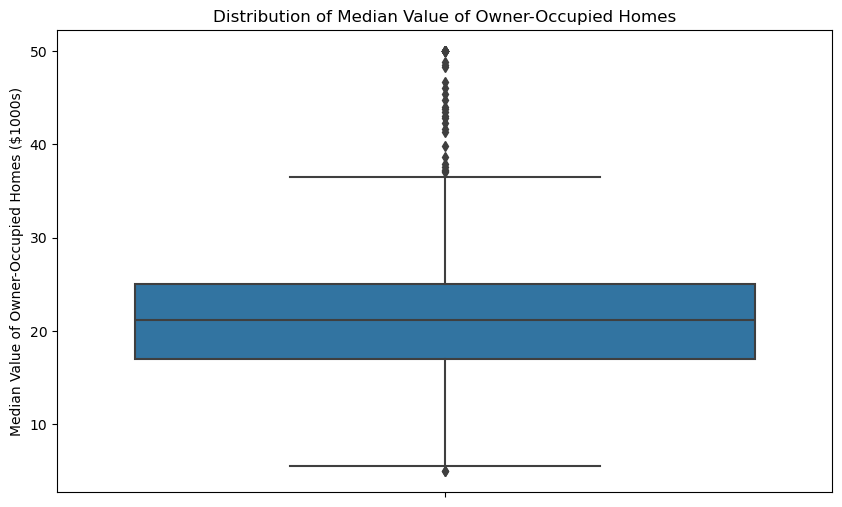

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

Bar Plot for the Charles River Variable

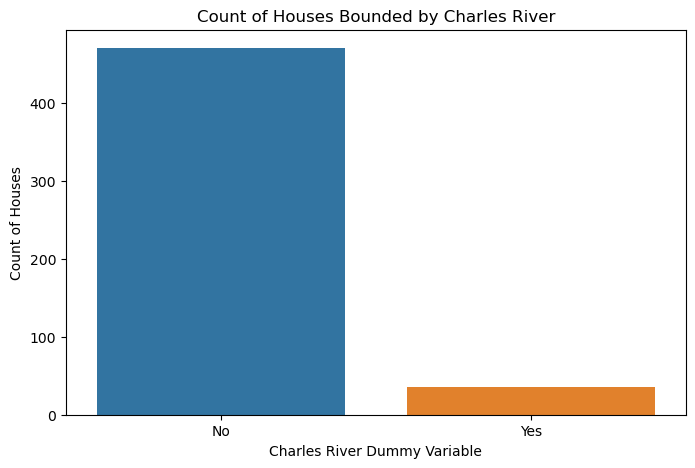

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Houses Bounded by Charles River')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Count of Houses')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Boxplot for MEDV vs. Discretized AGE Variable


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


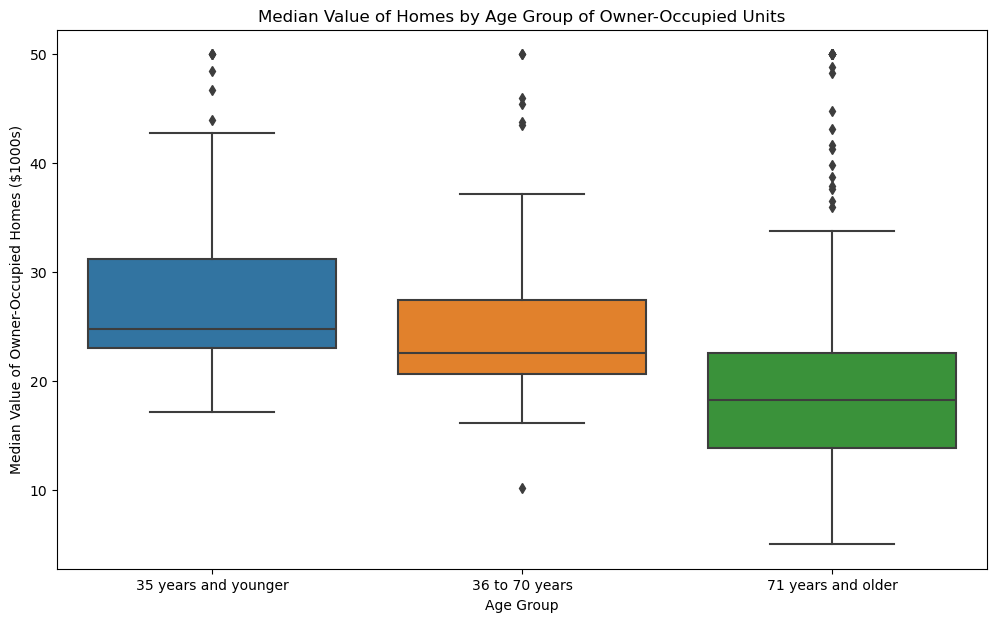

In [23]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '36 to 70 years', '71 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create the boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Homes by Age Group of Owner-Occupied Units')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

Scatter Plot for Nitric Oxide Concentrations (NOX) vs. Proportion of Non-Retail Business Acres

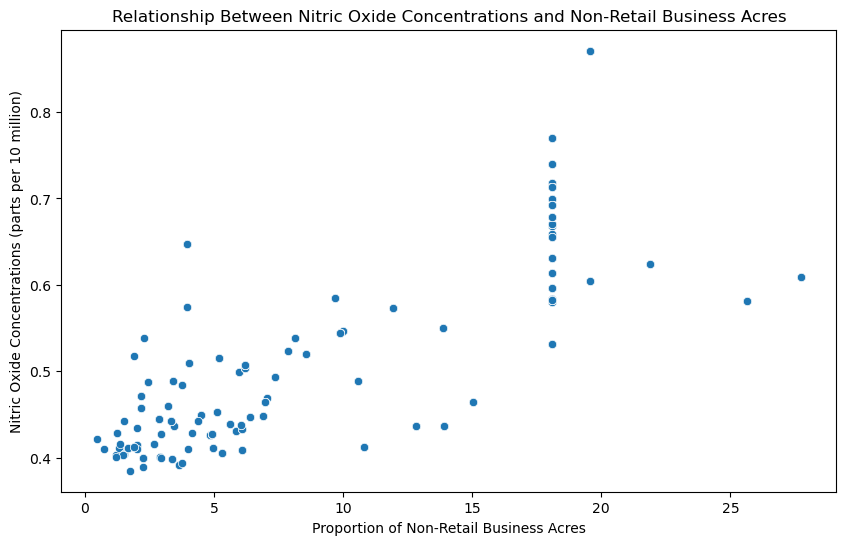

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.show()

Histogram for Pupil-Teacher Ratio Variable

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


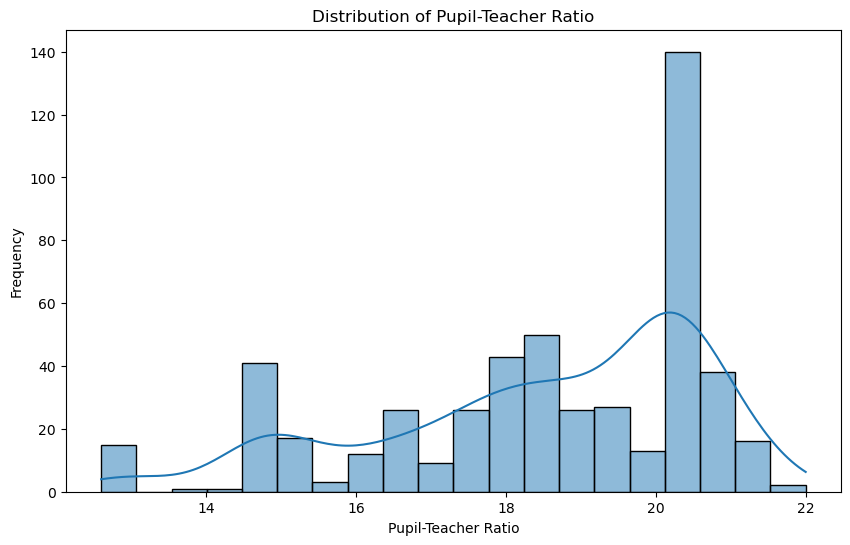

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [27]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '36 to 70 years', '71 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA using scipy
grouped = [boston_df[boston_df['AGE_GROUP'] == label]['MEDV'] for label in labels]
f_stat, p_value = stats.f_oneway(*grouped)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Perform ANOVA using statsmodels
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values across age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in median values across age groups.


In [28]:
# Perform Pearson correlation
corr_coefficient, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Pearson correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value_corr}')

# Conclusion
alpha = 0.05
if p_value_corr < alpha:
    print("Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.")


Pearson correlation coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.


In [29]:
# Perform regression analysis
model_reg = ols('MEDV ~ DIS', data=boston_df).fit()
regression_summary = model_reg.summary()

print(regression_summary)

# Extract p-value for the coefficient of DIS
p_value_dis = model_reg.pvalues['DIS']
alpha = 0.05
if p_value_dis < alpha:
    print("Reject the null hypothesis: The additional weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The additional weighted distance to the five Boston employment centres does not have a significant impact on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        10:41:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0